# Function Approximation

## 6.2 Polynomial Interpolation

ワイエルシュトラスの近似定理

閉区間[a, b]上で定義された実数値関数fにおいて,
$\forall \epsilon >0\ \ $  there exists a polynomial $\ p$,
$$
\|f - p\|_\infty = \sup_{x\in[a, b]} |f(x) - p(x)| < \epsilon
$$

つまり,閉区間上のどんな連続関数も, 任意の精度で多項式関数によって一様に近似することができる.

(ただしpの具体的な形については述べていない.)

一つの方法は, 区間を均等に分割して線形近似すること.

閉区間$[a, b]$, 分割数$n$のとき,
$$
x_i = a + \frac{i-1}{n-1}(b-a),\ \ \ \ \forall i = 1, 2, \ldots, n
$$

しかし, 均等に分割した区間の分割数$n$を増やすことで逆に近似の精度が悪くなる連続関数が存在する.(ルンゲ現象)

ルンゲ関数
$$f(x) = 1/(1 + 25x^2)$$
がいい例

In [1]:
using Plots
pyplot()
include("myLinInterp.jl")


Use "(a::LinearInterpolation)(...)" instead.


MyLinInterp

In [2]:
function get_uniform_nodes(a, b, n)
    return linspace(a, b, n)
end

get_uniform_nodes (generic function with 1 method)

In [3]:
function get_chebychev_nodes(a, b, n)
    return (a + b) / 2 .+ ((b - a) / 2) * cos(pi .* (1 .+ (0.5 .- 1:n) ./ n))
end

get_chebychev_nodes (generic function with 1 method)

In [4]:
function get_errors(f, p, x)
    return map(p, x) .- map(f, x)
end

get_errors (generic function with 1 method)

In [5]:
function get_errors(f, a, b, n, x; node_func=get_uniform_nodes)
    grid = node_func(a, b, n)
    g = get_polynomial_approx(grid, f)
    return map(g, x) .- map(f, x)
end

get_errors (generic function with 2 methods)

In [6]:
function sup_norm(a, b, f, p; division=1000)
    return maximum(map(x -> abs(f(x) - p(x)), linspace(a, b, division)))
end

sup_norm (generic function with 1 method)

In [7]:
function sup_norm(a, b, n::Int, f; node_func=get_uniform_nodes, division=1000)
    grid = node_func(a, b, n)
    g = get_polynomial_approx(grid, f)
    return sup_norm(a, b, f, g, division=division)
end

sup_norm (generic function with 2 methods)

In [43]:
function interpolation_error(a, b, n::Int, f; node_func=get_uniform_nodes, adj_f = x -> log(10, x))
    return adj_f(sup_norm(a, b, n, f, node_func=node_func)) # calc log_10(norm(f - ^f))
end

interpolation_error (generic function with 1 method)

In [22]:
function get_polynomial_approx(grid, f)
    vals = map(f, grid)
    
    n = length(grid)
    phi = Array(Float64, n, n)
    for i in 1:n
        for j in 1:n
            phi[i, j] = grid[i]^(j-1)
        end
    end
    
    c = phi \ vals
    return x -> sum(c_i * x^(i - 1) for (i, c_i) in enumerate(c))
end 

get_polynomial_approx (generic function with 1 method)

ルンゲ関数

In [10]:
runge_function(x) = 1./(1 .+ 25.*(x.^2))

runge_function (generic function with 1 method)

In [34]:
a = -5
b = 5
node_range = 10:10:50
errors = Array(Float64, length(node_range))
for (i, n) in enumerate(10:10:50)
    errors[i] = interpolation_error(a, b, n, runge_function)
end


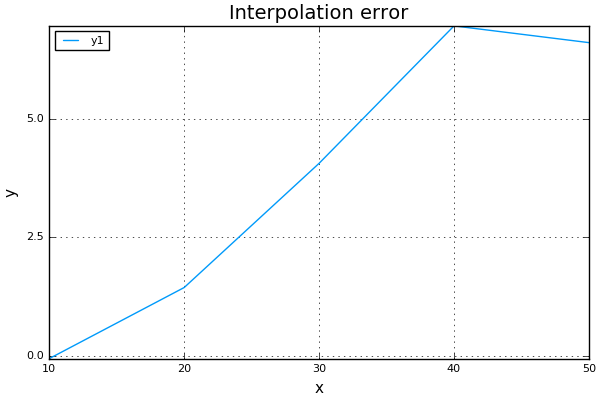

In [37]:
plot(node_range, errors, title="Interpolation error", xlabel="x", ylabel="y")

In [25]:
vals

19-element Array{Float64,1}:
 -0.0635346
  1.67751  
  1.43882  
  4.17893  
  4.06459  
  6.80577  
  6.96984  
  6.8161   
  6.61575  
  6.82366  
  8.00733  
  6.41286  
  8.18089  
  7.2725   
  6.56248  
  7.52553  
  6.2795   
  7.07037  
  7.00932  

そこで, 区間を均等に分割するのではなくchebychev nodesを使う.
$$
x_i = \frac{a + b}{2} + \frac{b - a}{2} \cos\biggl(\frac{n - i + 0.5}{n}\pi\biggr), \ \ \ \forall i = 1, 2, \ldots, n
$$

In [26]:
a = 1
b = 10
n = 10
nodes = get_chebychev_nodes(a, b, n)

11-element Array{Float64,1}:
 1.0554 
 1.0554 
 1.49047
 2.31802
 3.45704
 4.79604
 6.20396
 7.54296
 8.68198
 9.50953
 9.9446 

chebychev nodeは区間の端の方に密集する.


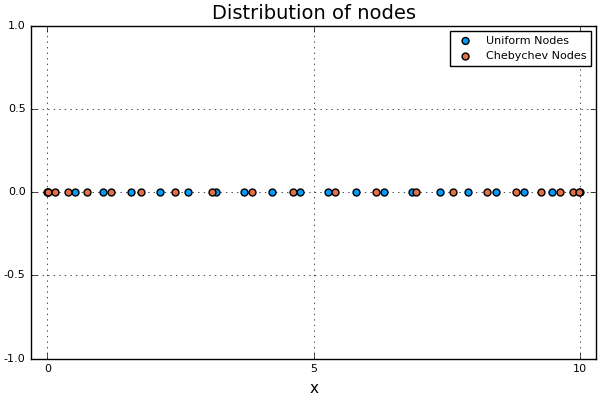

In [14]:
a = 0
b = 10
n = 20

scatter(get_uniform_nodes(a, b, n), zeros(n), ylim=(-1, 1), markersize=5, xlabel="x", title="Distribution of nodes", label="Uniform Nodes")
scatter!(get_chebychev_nodes(a, b, n), zeros(n), markersize=5, label="Chebychev Nodes")

Rivlin's Theoremによると, Chebychev-node多項式補完は最適な多項式近似にとても近い.

Chebychev-node多項式補完においてノード数$n$の補完による誤差を$e_n = \|f - \hat{f}\|$,

他の任意のノード数nの多項式近似によって得られる最小の誤差を$e'_n$とすると,
$$
e_n \leq (2\pi \log(n)+2) e'_n
$$
となる.

Jackson's Theoremによると, fが連続微分可能なら,
$$
e_n \leq \frac{6}{n} \|f'\|(b-a) [\log n / \pi + 1]
$$
となる.

右辺は$n\rightarrow \infty$で0となるので, Chebychev-node多項式補完において$n$を十分大きく取れば任意の精度で関数を近似できる.


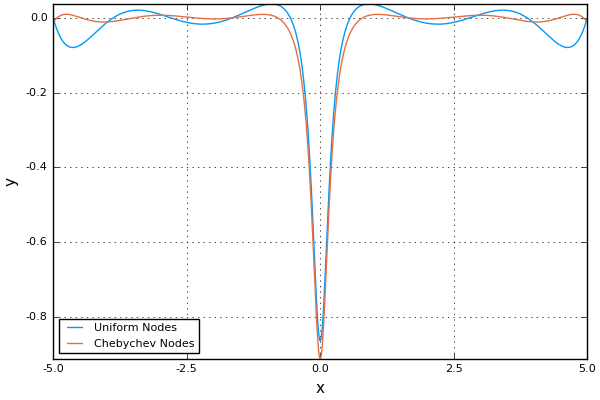

In [42]:
a = -5
b = 5
n = 10
domain = linspace(a, b, 1000)
f = runge_function

plot(domain, get_errors(f, a, b, n, domain; node_func=get_uniform_nodes), xlabel="x", ylabel="y", label="Uniform Nodes")
plot!(domain, get_errors(f, a, b, n, domain; node_func=get_chebychev_nodes), label="Chebychev Nodes")


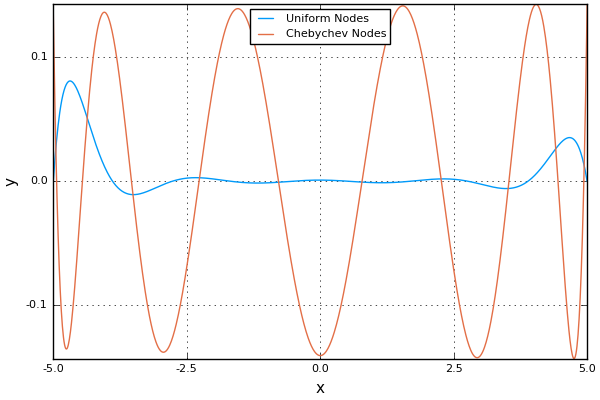

In [38]:
a = -5
b = 5
n = 10
domain = linspace(a, b, 1000)
f = x -> exp(-x)

plot(domain, get_errors(f, a, b, n, domain; node_func=get_uniform_nodes), xlabel="x", ylabel="y", label="Uniform Nodes")
plot!(domain, get_errors(f, a, b, n, domain; node_func=get_chebychev_nodes), label="Chebychev Nodes")


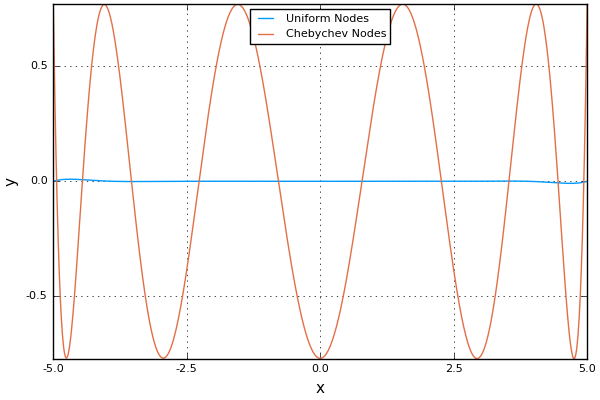

In [28]:
a = -5
b = 5
n = 10
domain = linspace(a, b, 1000)
f = x -> sin(x)

plot(domain, get_errors(f, a, b, n, domain; node_func=get_uniform_nodes), xlabel="x", ylabel="y", label="Uniform Nodes")
plot!(domain, get_errors(f, a, b, n, domain; node_func=get_chebychev_nodes), label="Chebychev Nodes")


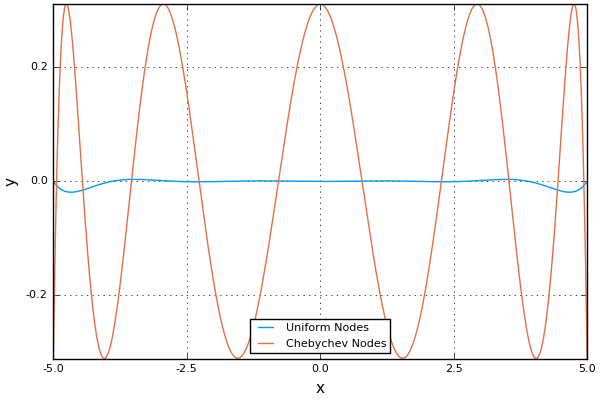

In [29]:
a = -5
b = 5
n = 10
domain = linspace(a, b, 1000)
f = x -> cos(x)

plot(domain, get_errors(f, a, b, n, domain; node_func=get_uniform_nodes), xlabel="x", ylabel="y", label="Uniform Nodes")
plot!(domain, get_errors(f, a, b, n, domain; node_func=get_chebychev_nodes), label="Chebychev Nodes")


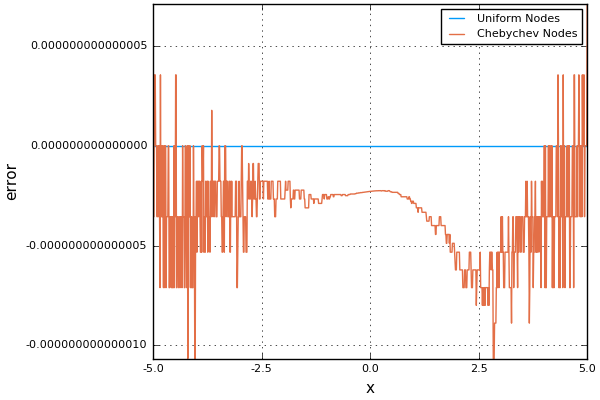

In [41]:
a = -5
b = 5
n = 10
domain = linspace(a, b, 1000)
f = x -> x^2

plot(domain, get_errors(f, a, b, n, domain; node_func=get_uniform_nodes), xlabel="x", ylabel="error", label="Uniform Nodes")
plot!(domain, get_errors(f, a, b, n, domain; node_func=get_chebychev_nodes), label="Chebychev Nodes")